## Lab Assignment 2 - Maisie Wilkinson
## 210007696
## Link to Github repository: https://github.com/MaisieWilkinson/Assignment_2_MaisieWilkinson

#### Run this cell to connect to your GIS and get started:

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

#### Task 1- See if a number is divisible by 3

In [7]:
number = 1

if number % 3 == 0:
    print(f"{number} is divisible by 3")
else:
    print(f"{number} is not divisible by 3")

3 is divisible by 3


#### T2- Create an If...Else statement that will test whether a type of fruit, represented as a text string is in a list of acceptable fruits. 

In [9]:
fruit = 'orange'
acceptable_fruit = ['apple', 'orange', 'pear', 'kiwi', 'strawberry']

if fruit in acceptable_fruit:
    print(f"{fruit} is acceptable!")
else:
    print(f"{fruit} is unacceptable!")

orange is acceptable!


#### T3: Create a function to calculate the distance between two coordinates using the haversine formula

In [10]:
import math

def haversine_distance(coord1, coord2):
    
    #Convert to radians
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Radius of the Earth
    radius = 6371
    
    # Calculate the distance
    distance = radius * c
    
    return distance

#Test
coord1 = [30, 40] 
coord2 = [50, 20] 

distance = haversine_distance(coord1, coord2)
print(f"The distance between the two coordinates is {distance} kilometers.")

The distance between the two coordinates is 2782.6833243783553 kilometers.


### Part 2- Pandas and NumPy
#### Import data and libraries

In [1]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('/arcgis/home/portland_park_trees.csv')
df.head()

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


##### Q1- How many trees are of the Quercus or Acer Genus?

In [80]:
#Subset
quercus_acer = df['Genus'].isin(['Quercus', 'Acer'])
qa_count = quercus_acer.sum()
print(f' There are {qa_count} trees from the Quercus and Acer Genus')

 There are 5675 trees from the Quercus and Acer Genus


##### Q2- How How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [77]:
#Subset group interested in
qa_50 = (df['Genus'].isin(['Quercus', 'Acer']) & (df['DBH'] > 50))
#Count
count = qa_50.sum()

print(f'There are {count} trees of the Quercus or Acer genus with a DBH larger than 50 inches.')

There are 124 trees of the Quercus or Acer genus with a DBH larger than 50 inches.


##### Q3- Which genus has the highest mean DBH of the following genera: Quercus, Acer or Fraxinus?

In [62]:
#Get groups that we are interested in
subset = df[df['Genus'].isin(['Quercus', 'Acer', 'Fraxinus'])]

#Find the means of each group
mean_dbh = subset.groupby('Genus')['DBH'].mean()
print(mean_dbh)

#Find group with largest mean
highest_mean_dbh_genus = mean_dbh.idxmax()


print(f'Therefore, {highest_mean_dbh_genus} is the genus with the highest mean')

Genus
Acer        18.419085
Fraxinus    11.033610
Quercus     23.568238
Name: DBH, dtype: float64
Therefore, Quercus is the genus with the highest mean


##### Q4: How many different species of trees are recorded in the Acer genus?

In [82]:
#Subset
acer = df[df['Genus'] == 'Acer']
#Find number of unique species within Acer subset
acer_species_count = acer['Species'].nunique()

print(f'There are {acer_species_count} different species of trees in the Acer genus')

There are 20 different species of trees in the Acer genus


#### Reading in new data set- world cities

In [92]:
world_cities = pd.read_csv('/arcgis/home/world_cities.csv')
world_cities.head()

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


#### Q5.1 Create a new column named "pop_M" by transforming the population column. 

In [93]:
world_cities['pop_M'] = world_cities['pop'] / 1000000
world_cities.head()

,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
4,'Abud,Palestine,2456,32.03,35.07,0,0.002456


###### 5.2- Remove the original pop column

In [94]:
world_cities = world_cities.drop(columns=['pop'])
world_cities.head()

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


###### Choose/subset a city that starts with the same letter as your first name- I'm choosing Moscow

In [101]:
moscow = world_cities[world_cities['city'] == 'Moscow']
moscow.head()

,city,country,lat,lon,capital,pop_M
24631,Moscow,Russia,55.75,37.62,1,10.472629


##### subset 5 biggest cities from country where your city is

In [106]:
# Moscow is in Russia
russia = world_cities[world_cities['country']== 'Russia']

#Sort the subset by population in descending order and select the top 5
top5_russian_cities = russia.nlargest(5, 'pop_M')

##### Print result

In [109]:
print(top5_russian_cities)

                   city country    lat    lon  capital      pop_M
24631            Moscow  Russia  55.75  37.62        1  10.472629
32184  Saint Petersburg  Russia  59.93  30.32        0   4.014710
26493       Novosibirsk  Russia  55.04  82.93        0   1.417107
42286     Yekaterinburg  Russia  56.85  60.60        0   1.285879
26153  Nizhniy Novgorod  Russia  56.33  44.00        0   1.275318


### Part 3- Data Visualization

##### Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.)

In [3]:
import seaborn as sns

In [115]:
df.head()

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


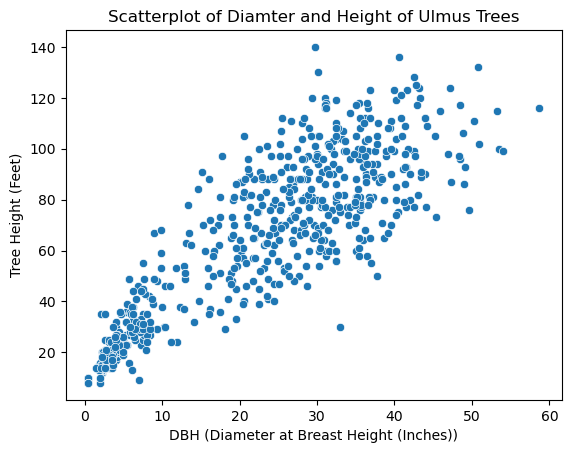

In [117]:
#Subset the data you want to use:
ulmus = df[df['Genus'] == 'Ulmus']

#Using seaborn for scatterplot:
sns.scatterplot(data=ulmus, x='DBH', y='TreeHeight')

#labels and title
plt.xlabel('DBH (Diameter at Breast Height (Inches))')
plt.ylabel('Tree Height (Feet)')
plt.title('Scatterplot of Diamter and Height of Ulmus Trees')

plt.show()

##### Q2- Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

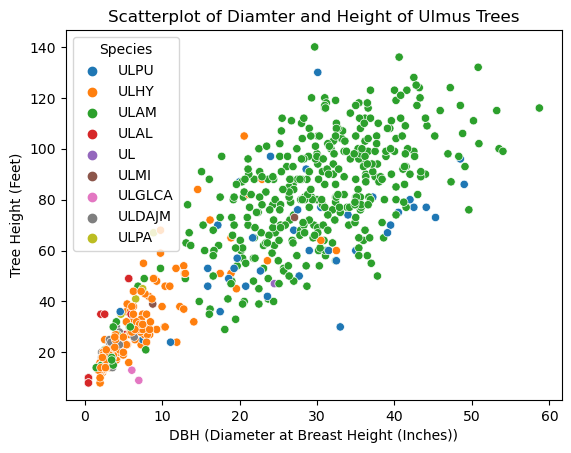

In [124]:
#Use the same code but edit it slightly to include hue: 

#Using seaborn for scatterplot:
sns.scatterplot(data=ulmus, x='DBH', y='TreeHeight', hue='Species')

#labels and title
plt.xlabel('DBH (Diameter at Breast Height (Inches))')
plt.ylabel('Tree Height (Feet)')
plt.title('Scatterplot of Diamter and Height of Ulmus Trees')

plt.show()

##### Q3- Create a boxplot of DBH for just the Ulmus genus differentiated by species (each species should have its own box-plot). 

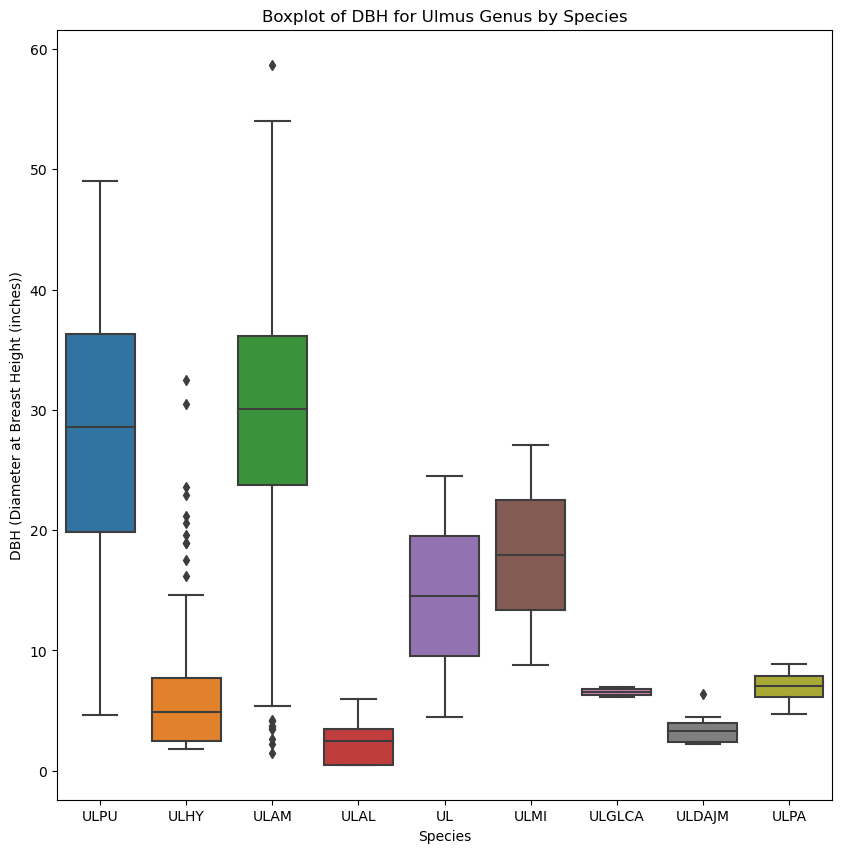

In [134]:
#Create boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=ulmus, x='Species', y='DBH')

# Set plot labels and title
plt.xlabel('Species')
plt.ylabel('DBH (Diameter at Breast Height (inches))')
plt.title('Boxplot of DBH for Ulmus Genus by Species')

# Show the plot
plt.show()

##### Q4- Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs.

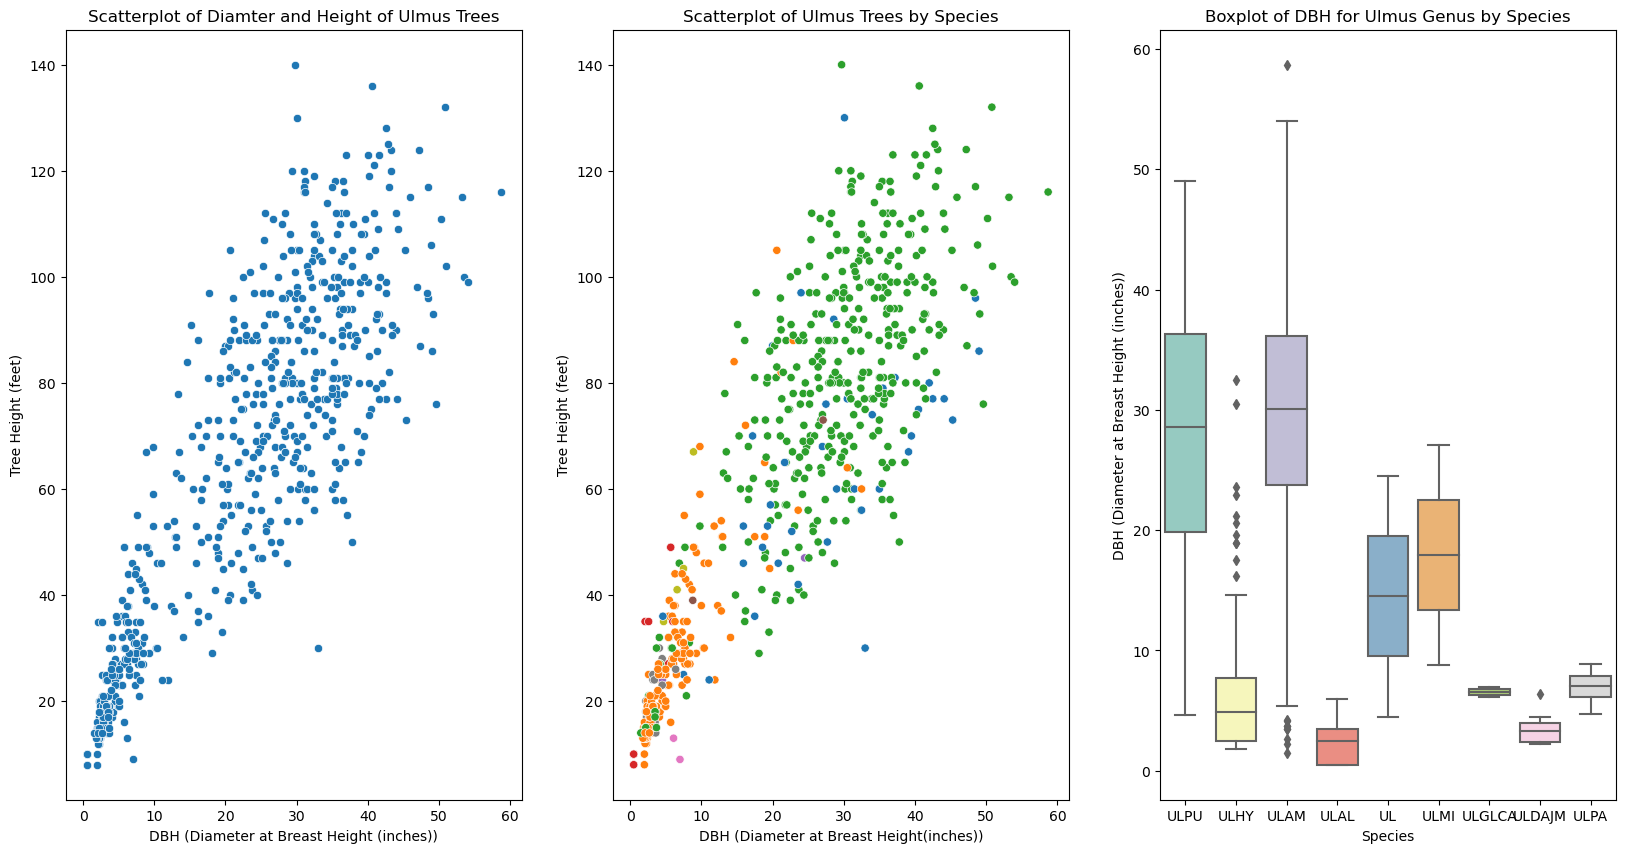

In [150]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

#Scatterplot 1
sns.scatterplot(data=ulmus, x='DBH', y='TreeHeight', ax=axes[0])
axes[0].set_xlabel('DBH (Diameter at Breast Height (inches))')
axes[0].set_ylabel('Tree Height (feet)')
axes[0].set_title('Scatterplot of Diamter and Height of Ulmus Trees')

# Scatterplot on the first subplot
sns.scatterplot(data= ulmus, x='DBH', y='TreeHeight', hue='Species', ax=axes[1])
axes[1].set_xlabel('DBH (Diameter at Breast Height(inches))')
axes[1].set_ylabel('Tree Height (feet)')
axes[1].set_title('Scatterplot of Ulmus Trees by Species')
#Remove legend
axes[1].legend().set_visible(False)

# Boxplot on the second subplot
sns.boxplot(data=ulmus, x='Species', y='DBH', palette='Set3', ax=axes[2])
axes[2].set_xlabel('Species')
axes[2].set_ylabel('DBH (Diameter at Breast Height (inches))')
axes[2].set_title('Boxplot of DBH for Ulmus Genus by Species')

# Show the combined plot
plt.show()

### Part 4- Python GeoPandas

In [4]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyproj from https://files.pythonhosted.org/packages/97/0a/b1525be9680369cc06dd288e12c59d24d5798b4afcdcf1b0915836e1caa6/pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/83/35/562e72099bf50228fa2a8e161db35a94090f3939cb73aa54e385096ca3ff/contextily-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

#### T1: Read in the data

In [7]:
gdf= gpd.read_file('/arcgis/home/SG_FloodDisadvantage_2015.zip')
gdf.head()

,DZ_CODE,DZ_NAME,CouncilAre,Intermedia,area,local_auth,i1_Age04,i2_Age75,i3_LTLI,i4_HH_LTLI,...,ZDS200_cl,ZDS200ccCL,URC,URC_desc,coast_2km,PVA,PVA_desc,Shape_STAr,Shape_STLe,geometry
0,S01000001,None,S12000033,S02000003,4465935.87,Aberdeen City,7.110092,6.536697,15.596330,24.056604,...,Average,Average,3.0,Accessible small towns,Inland,1.0,Within PVAs,4.465936e+06,12834.265269,"POLYGON ((383761.188 800775.311, 383771.836 80..."
1,S01000002,None,S12000033,S02000001,308949.94,Aberdeen City,9.292035,1.032448,5.899705,11.698113,...,Not exposed,Extremely low,1.0,Large urban areas,Coastal,0.0,Outside PVAs,3.089499e+05,2765.762760,"POLYGON ((395167.388 800776.203, 395171.029 80..."
2,S01000003,None,S12000033,S02000001,133045.81,Aberdeen City,5.456853,1.269036,6.979695,14.836795,...,Relatively low,Relatively low,1.0,Large urban areas,Coastal,0.0,Outside PVAs,1.330458e+05,2339.841599,"POLYGON ((394936.000 800980.000, 394944.704 80..."
3,S01000004,None,S12000033,S02000001,199774.15,Aberdeen City,5.065359,3.431373,7.843137,16.216216,...,Relatively low,Relatively low,1.0,Large urban areas,Coastal,0.0,Outside PVAs,1.997742e+05,2490.039812,"POLYGON ((394550.000 800920.000, 394581.000 80..."
4,S01000005,None,S12000033,S02000003,158273.80,Aberdeen City,5.598756,3.421462,11.819596,18.823529,...,Relatively high,Relatively high,3.0,Accessible small towns,Inland,1.0,Within PVAs,1.582738e+05,3248.681878,"POLYGON ((383752.000 801118.000, 383754.509 80..."


#### T2- plot first and last 5 values

<AxesSubplot: >

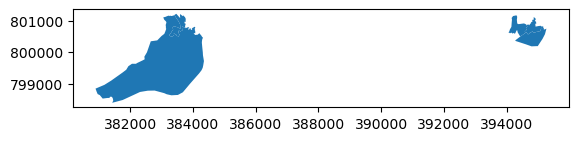

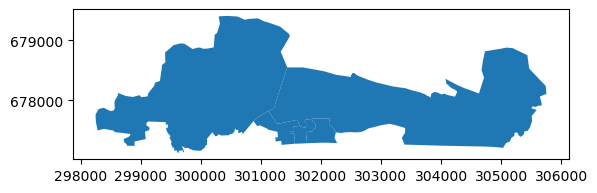

In [8]:
#Get the head and the tail (first and last 5)
head_gdf = gdf.head(5)
tail_gdf = gdf.tail(5)

#plot them
head_gdf.plot()
tail_gdf.plot()

#### T3. Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

In [ ]:
gdf.explore(column='local_auth')

#### T4. What is the Coordinate Reference System of the selected dataset?


In [10]:
gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

#### T5. How many features does the selected dataset contain?

In [11]:
gdf.shape 

(6500, 90)

#### T6. Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [18]:
newgdf1 = gdf[gdf['ZDS200_cl'] == 'Average']

#### T7. Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [19]:
newgdf2 = newgdf1[newgdf1['i4_HH_LTLI'] >20]

#### T8. Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

Text(0.5, 1.0, 'Chloropleth Map')

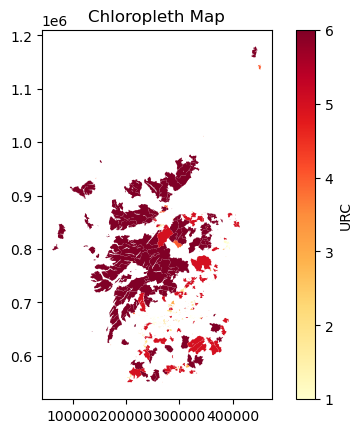

In [14]:
fig, ax = plt.subplots(1, 1)
newgdf2.plot(column="URC", cmap="YlOrRd", ax=ax, legend=True, legend_kwds={'label': "URC", 'orientation': "vertical"})
plt.title('Chloropleth Map')

# Part 5

In [20]:
pip install earthpy rasterio

Note: you may need to restart the kernel to use updated packages.


In [21]:
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

#### Task 1. Read the file as a rasterio dataset

In [22]:
elev = rio.open('/arcgis/home/elev.tif')

#### T2: What is the CRS of the dataset?


In [23]:
print(elev.crs)

EPSG:32617


#### T3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset

In [24]:
print(elev.count)
print(elev.width)
print(elev.height)
print(elev.bounds)
print(elev.crs)

1
6303
5897
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617


#### T4: Create a plot/map of the raster dataset

1490
-32768


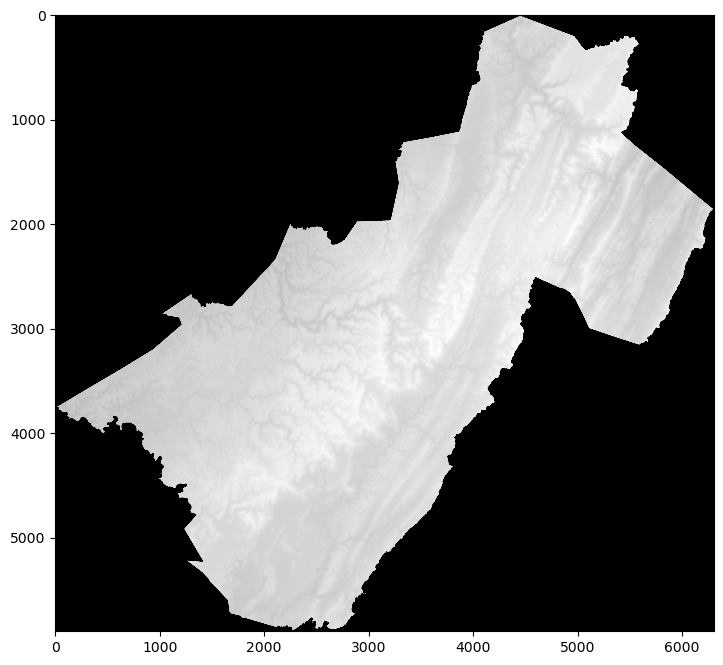

In [25]:
#convert into NumPy array
elev_array = elev.read(1)
image_read_masked = np.ma.masked_array(elev_array, mask=(elev_array == 0))

#find min and max to find values to improve display with vmin and vmax values
print(elev_array.max())
print(elev_array.min())

#Visualize the data
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray", vmin=-3276, vmax=1490)

#### T5: Create Histograms from the raster

(<Figure size 1200x1200 with 1 Axes>, <AxesSubplot: >)

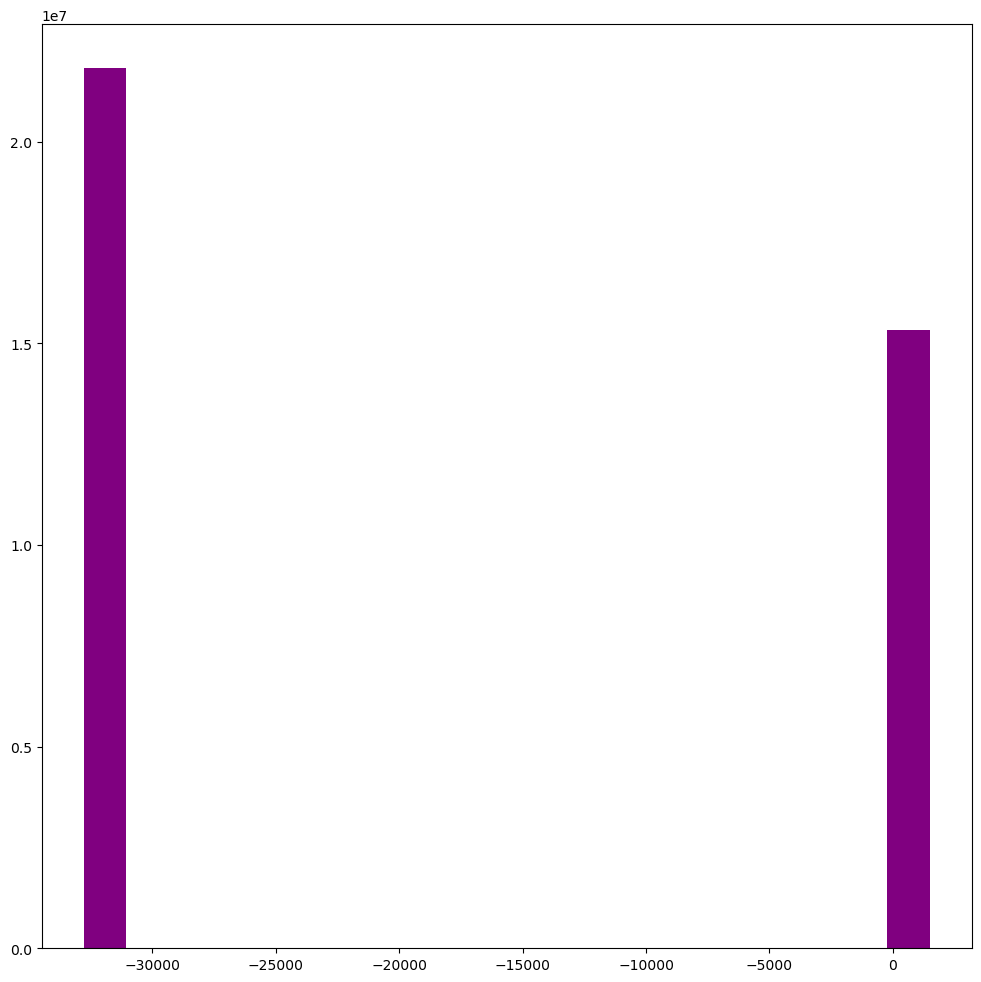

In [26]:
#Create histogram
ep.hist(elev_array)

(<Figure size 1200x1200 with 1 Axes>, <AxesSubplot: >)

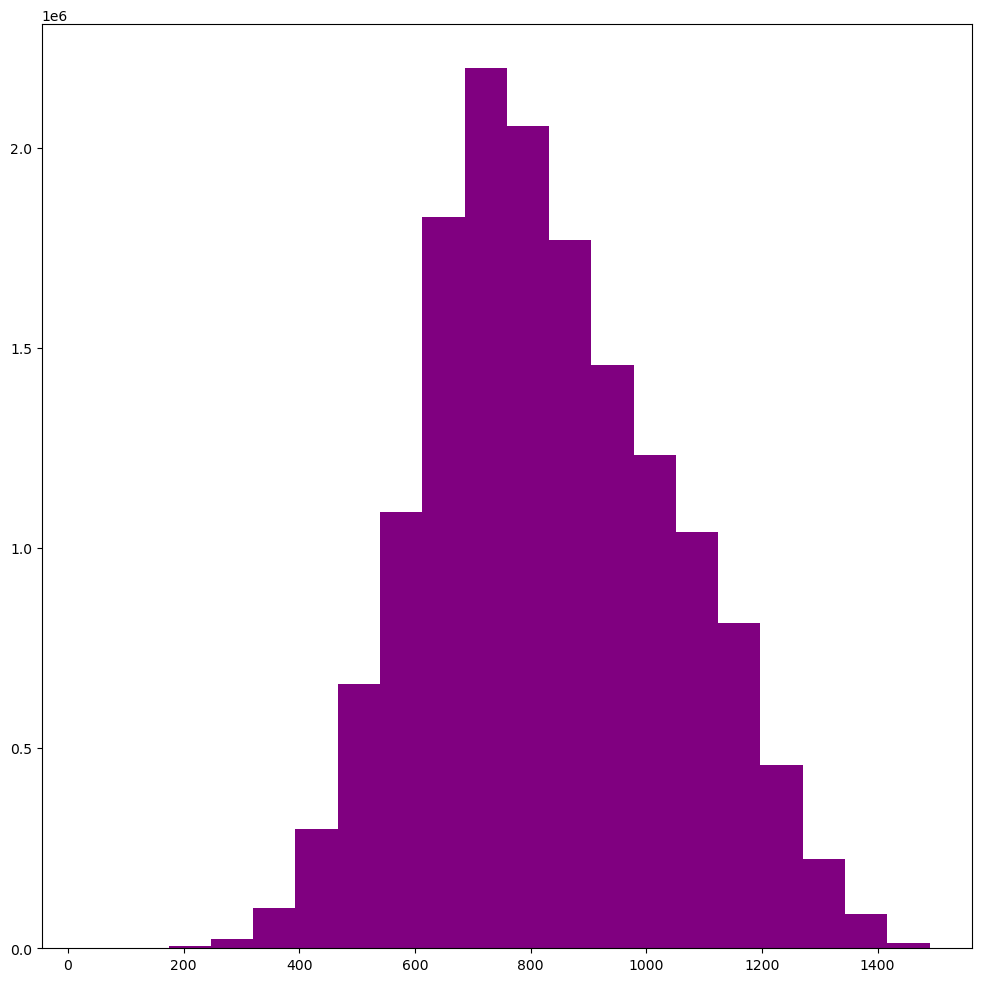

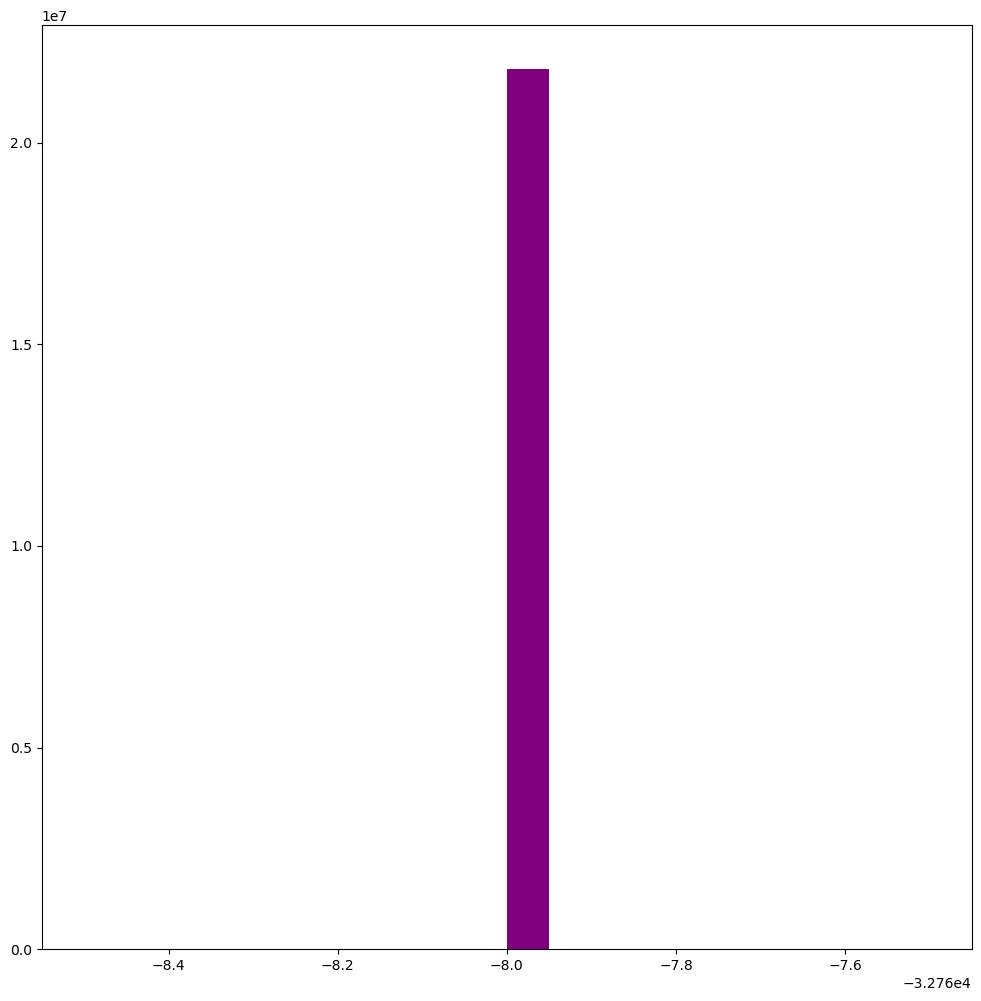

In [27]:
#create mask
mask = elev_array > -5000
mask_array =elev_array[mask]

#Make histogram
ep.hist(mask_array)

#and again for the other peak
mask2 = elev_array < -30000
mask_array2 =elev_array[mask2]
ep.hist(mask_array2)